🔄 Inicializando análisis XAU/USD mejorado...
📊 Temporalidades: ['1M', '15M']
                    ANÁLISIS INSTITUCIONAL XAU/USD                    
🔍 Símbolo: GC=F
⏱️  Temporalidades: 1M, 15M
⚙️  Parámetros:
   - Sensibilidad anomalías: Z > 2.8
   - Volumen significativo: > 1.5x media



Presiona Enter para generar el análisis... 



📊 Generando dashboard profesional...

⏳ Descargando datos 1m...
✅ Datos 1m obtenidos: 300 velas

⏳ Descargando datos 15m...
✅ Datos 15m obtenidos: 150 velas


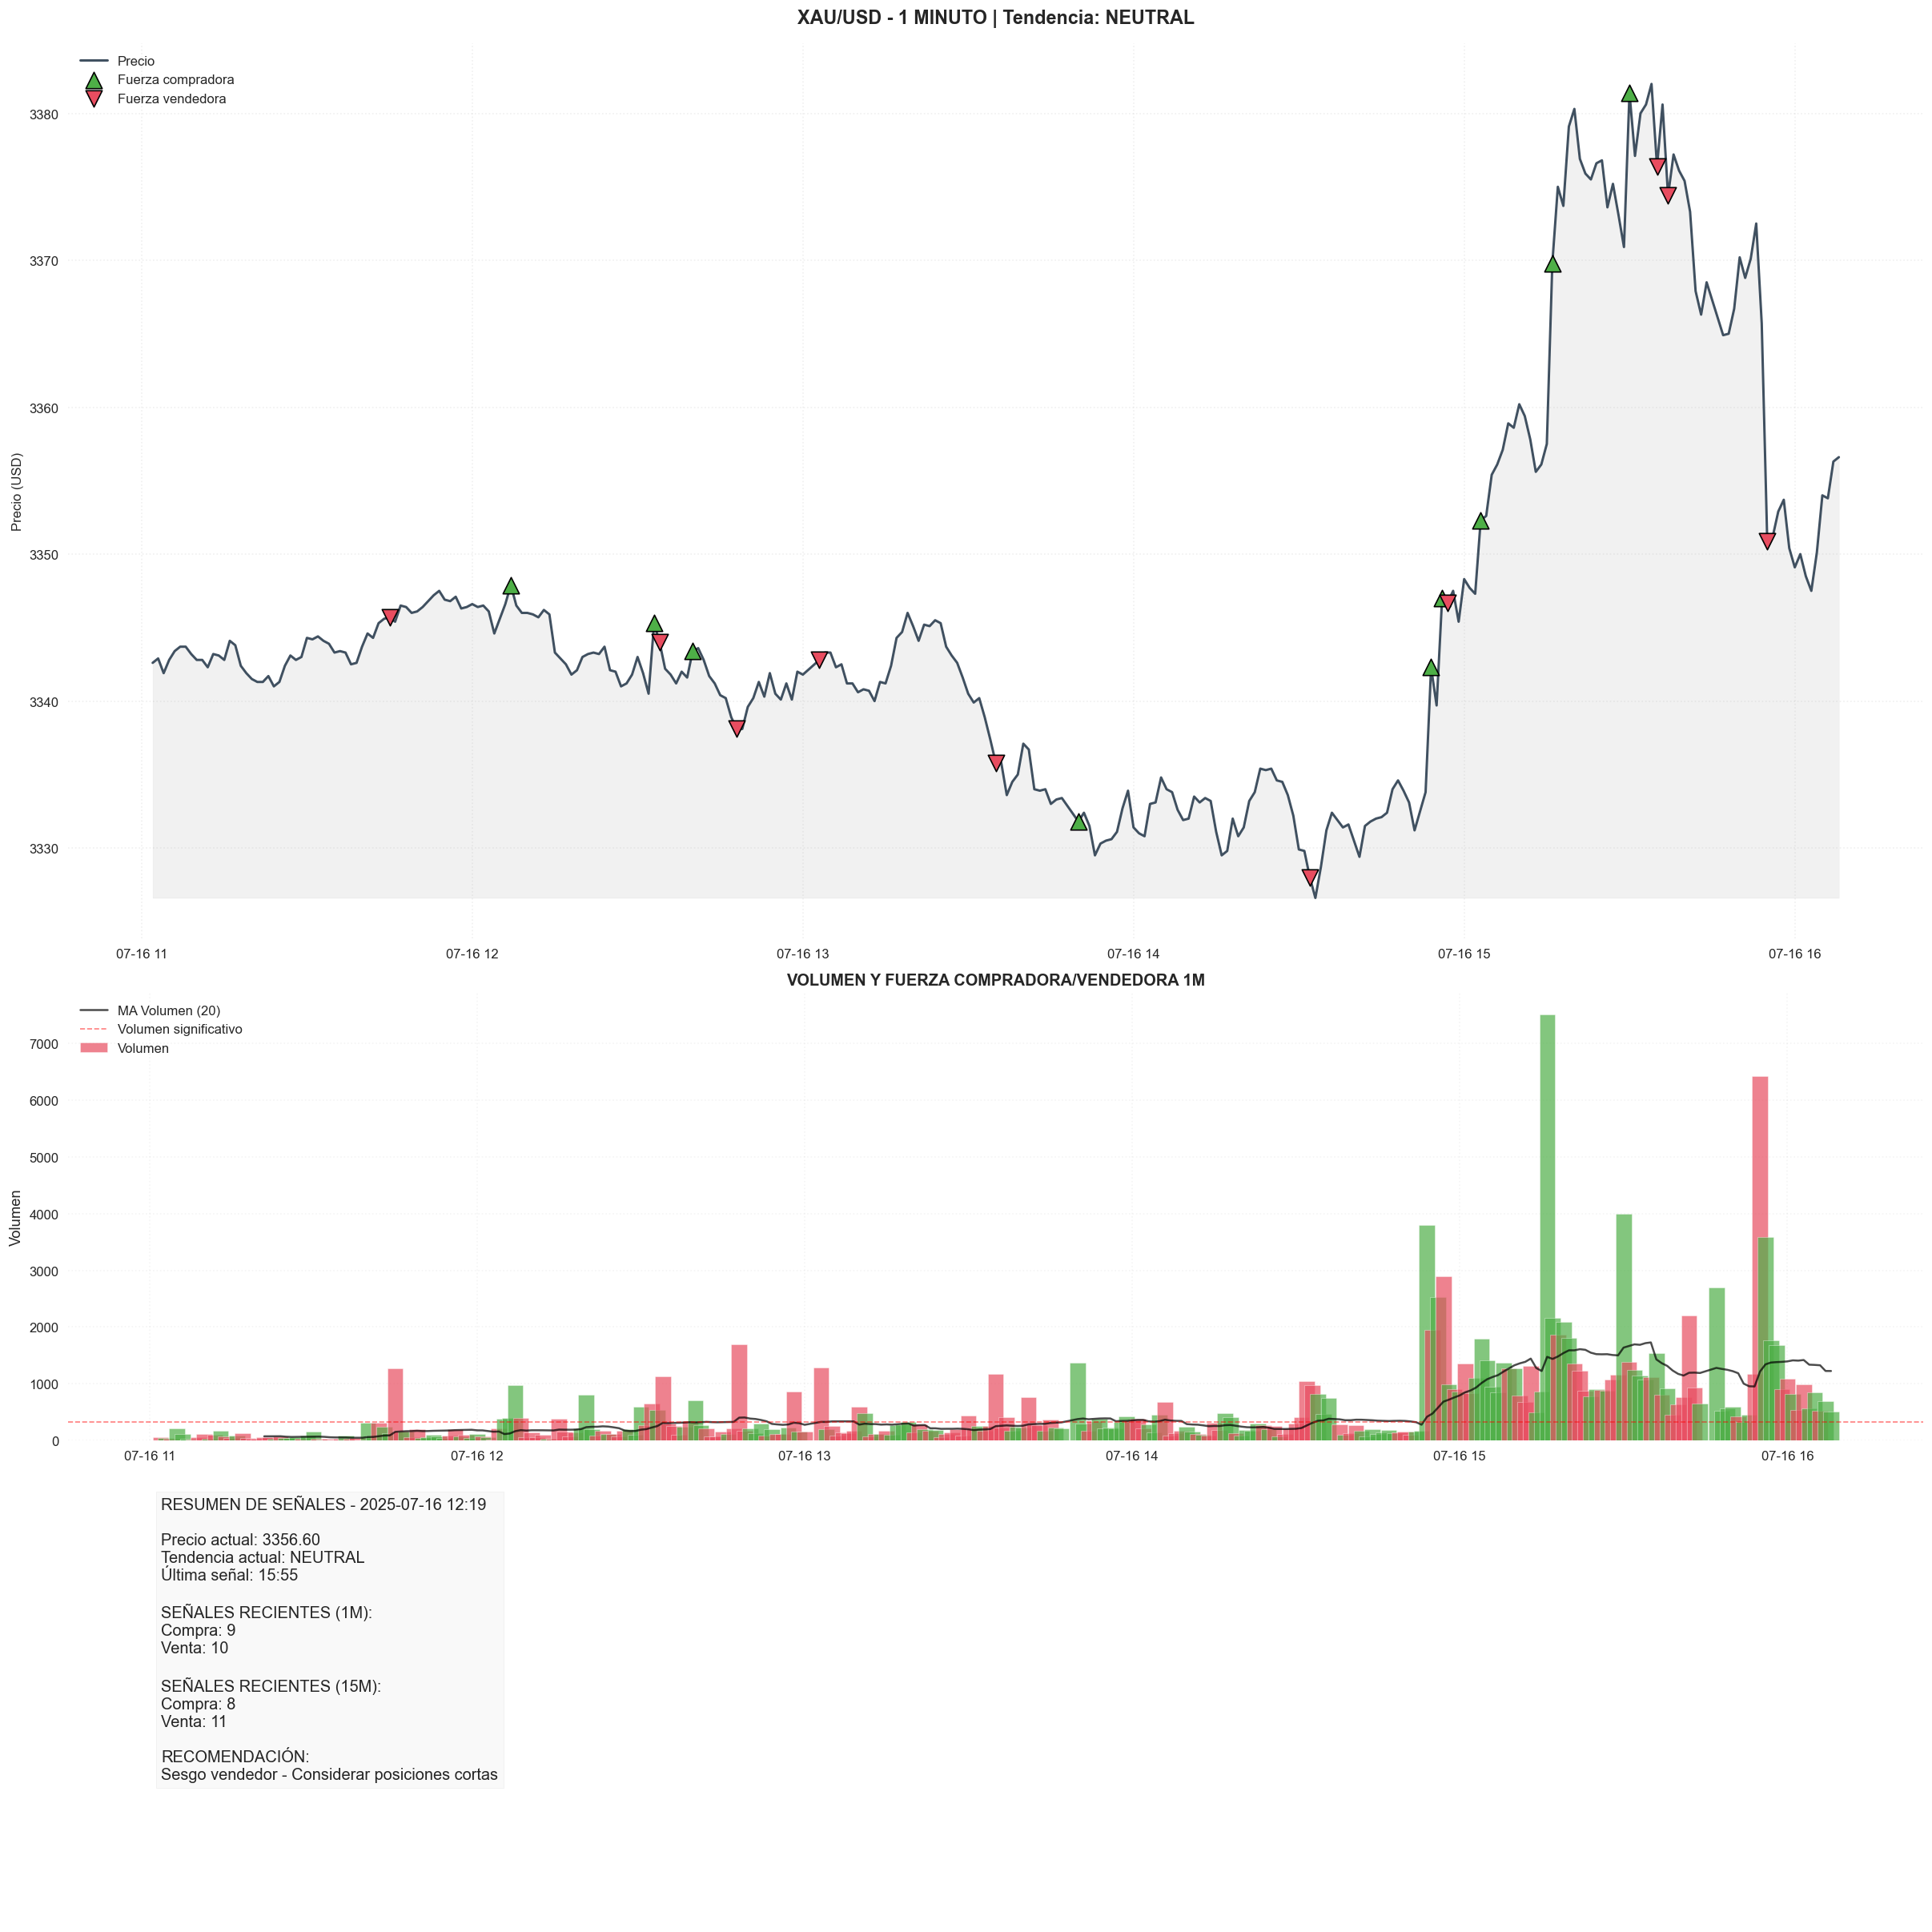


✅ Análisis completado correctamente


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
from scipy import stats

# Configuración visual profesional
plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.figsize': (20, 20),
    'figure.dpi': 120,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold'
})

# Paleta de colores corregida
COLORS = {
    'venta': "#E84D60",     # Rojo (fuerza compradora)
    'compra': "#4EAF47",      # Verde (fuerza vendedora)
    'vol_alto': "#FF7F0E",   # Naranja
    'precio': "#2C3E50",     # Gris oscuro
    'tendencia_alcista': "#1f77b4",
    'tendencia_bajista': "#d62728",
    'fondo': "#f7f7f7"
}

class AnalisisXAUUSD:
    def __init__(self):
        self.symbol = "GC=F"
        self.timeframes = {
            '1M': "1m",
            '15M': "15m"
        }
        # Parámetros optimizados
        self.anomaly_threshold = 2.8
        self.volume_multiplier = 2.0
        self.trend_volume_threshold = 1.5
        
        print("🔄 Inicializando análisis XAU/USD mejorado...")
        print(f"📊 Temporalidades: {list(self.timeframes.keys())}")

    def get_data(self, timeframe, count):
        """Obtiene y procesa datos de Yahoo Finance"""
        try:
            period_map = {'1m': '7d', '15m': '60d'}
            
            print(f"\n⏳ Descargando datos {timeframe}...")
            data = yf.download(
                tickers=self.symbol,
                period=period_map[timeframe],
                interval=timeframe,
                progress=False,
                auto_adjust=True
            )
            
            if data.empty:
                raise ValueError("No se recibieron datos del mercado")
                
            data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
            data.columns = ['open', 'high', 'low', 'close', 'volume']
            data.index.name = 'timestamp'
            
            data = data[data['volume'] > 0].iloc[-count:]
            data['returns'] = data['close'].pct_change()
            
            print(f"✅ Datos {timeframe} obtenidos: {len(data)} velas")
            return self.detect_anomalies(data)
            
        except Exception as e:
            print(f"⚠️ Error en datos reales: {str(e)}")
            return self.generate_simulated_data(timeframe, count)

    def generate_simulated_data(self, timeframe, count):
        """Genera datos simulados para pruebas"""
        np.random.seed(42)
        
        freq_map = {'1m': '1min', '15m': '15min'}
        dates = pd.date_range(end=pd.Timestamp.now(), periods=count, freq=freq_map[timeframe])
        
        base_price = 1800 + np.cumsum(np.random.randn(count) * 0.5)
        
        data = pd.DataFrame({
            'open': base_price,
            'high': base_price + np.abs(np.random.randn(count)) * 1.2,
            'low': base_price - np.abs(np.random.randn(count)) * 1.2,
            'close': base_price + np.random.randn(count) * 0.8,
            'volume': np.abs(np.random.normal(100, 30, count)).astype(int),
            'returns': np.zeros(count)
        }, index=dates)
        
        data['returns'] = data['close'].pct_change()
        return data

    def detect_anomalies(self, df):
        """Detección de anomalías con filtro de liquidez"""
        # Anomalías de volumen
        df['vol_mean'] = df['volume'].rolling(50, min_periods=10).mean()
        df['vol_std'] = df['volume'].rolling(50, min_periods=10).std()
        df['vol_z'] = (df['volume'] - df['vol_mean']) / (df['vol_std'] + 1e-6)
        
        # Anomalías de precio
        returns = df['returns']
        median = returns.rolling(50, min_periods=10).median()
        mad = 1.4826 * np.abs(returns - median).rolling(50, min_periods=10).median()
        df['ret_z'] = (returns - median) / (mad + 1e-6)
        
        # Filtro de liquidez
        df['liquidity_ok'] = df['volume'] > df['volume'].quantile(0.7)
        
        # Clasificación compuesta (CORREGIDA LA INDENTACIÓN)
        df['anomaly'] = (
            (np.abs(df['vol_z']) > self.anomaly_threshold) |
            (np.abs(df['ret_z']) > self.anomaly_threshold)
        ) & df['liquidity_ok']
        
        # Tipo de anomalía (colores corregidos)
        conditions = [
            (df['close'] > df['open']) & df['anomaly'],  # Compra (rojo)
            (df['close'] < df['open']) & df['anomaly']    # Venta (verde)
        ]
        choices = ['compra', 'venta']
        df['anomaly_type'] = np.select(conditions, choices, default=None)
        
        return df

    def detect_trend_by_volume(self, df):
        """Determina tendencia basada en volumen"""
        high_volume = df[df['volume'] > self.trend_volume_threshold * df['volume'].median()]
        
        if len(high_volume) < 5:
            return 'neutral'
        
        buy_ratio = len(high_volume[high_volume['close'] > high_volume['open']]) / len(high_volume)
        
        if buy_ratio > 0.65:
            return 'alcista'
        elif buy_ratio < 0.35:
            return 'bajista'
        else:
            return 'neutral'

    def plot_improved_analysis(self):
        """Dashboard visual mejorado"""
        print("\n📊 Generando dashboard profesional...")
        
        data_1m = self.get_data('1m', 300)
        data_15m = self.get_data('15m', 150)
        
        current_trend = self.detect_trend_by_volume(data_1m)
        trend_color = COLORS['tendencia_alcista'] if current_trend == 'alcista' else COLORS['tendencia_bajista'] if current_trend == 'bajista' else "#7f7f7f"
        
        fig = plt.figure(constrained_layout=True)
        gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[2,1,1])
        
        # Gráfico 1: Precio 1M con anomalías
        ax1 = fig.add_subplot(gs[0, :])
        self._plot_price_with_anomalies(ax1, data_1m, f"XAU/USD - 1 MINUTO | Tendencia: {current_trend.upper()}", trend_color)
        
        # Gráfico 2: Volumen y fuerza
        ax2 = fig.add_subplot(gs[1, :])
        self._plot_volume_trend(ax2, data_1m, "VOLUMEN Y FUERZA COMPRADORA/VENDEDORA 1M")
        
        # Gráfico 3: Resumen
        ax3 = fig.add_subplot(gs[2, :])
        self._plot_signal_summary(ax3, data_1m, data_15m, current_trend)
        
        plt.show()
        print("\n✅ Análisis completado correctamente")

    def _plot_price_with_anomalies(self, ax, data, title, trend_color):
        """Gráfico de precio con anomalías"""
        ax.plot(data.index, data['close'], 
               color=COLORS['precio'], 
               linewidth=1.8, 
               alpha=0.9,
               label='Precio')
        
        ax.fill_between(data.index, data['close'], data['close'].min(), 
                       color=trend_color, alpha=0.1)
        
        if 'anomaly_type' in data.columns:
            anomalies = data[data['anomaly_type'].notna()]
            
            # Compras (rojo)
            buy_signals = anomalies[anomalies['anomaly_type'] == "compra"]
            if not buy_signals.empty:
                ax.scatter(buy_signals.index, buy_signals['close'],
                          color=COLORS['compra'], s=150,
                          label='Fuerza compradora',
                          marker='^',
                          edgecolors='black',
                          linewidth=1,
                          zorder=5)
            
            # Ventas (verde)
            sell_signals = anomalies[anomalies['anomaly_type'] == "venta"]
            if not sell_signals.empty:
                ax.scatter(sell_signals.index, sell_signals['close'],
                          color=COLORS['venta'], s=150,
                          label='Fuerza vendedora',
                          marker='v',
                          edgecolors='black',
                          linewidth=1,
                          zorder=5)
        
        ax.set_title(title, pad=15, fontsize=14, fontweight='bold')
        ax.set_ylabel('Precio (USD)', fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.3)
        ax.legend(loc='upper left')

    def _plot_volume_trend(self, ax, data, title):
        """Gráfico de volumen"""
        colors = np.where(
            data['close'] > data['open'],
            COLORS['compra'],
            COLORS['venta']
        )
        
        ax.bar(data.index, data['volume'], 
              color=colors, 
              width=0.002, 
              alpha=0.7,
              label='Volumen')
        
        if len(data) > 20:
            ax.plot(data.index, data['volume'].rolling(20).mean(),
                   color='black', 
                   linewidth=1.5, 
                   alpha=0.7,
                   label='MA Volumen (20)')
        
        vol_threshold = self.trend_volume_threshold * data['volume'].median()
        ax.axhline(vol_threshold, 
                  color='red', 
                  linestyle='--', 
                  alpha=0.5,
                  linewidth=1,
                  label='Volumen significativo')
        
        ax.set_title(title, fontsize=12)
        ax.set_ylabel('Volumen')
        ax.grid(True, linestyle=':', alpha=0.2)
        ax.legend(loc='upper left')

    def _plot_signal_summary(self, ax, data_1m, data_15m, trend):
        """Resumen de señales"""
        ax.axis('off')
        
        signals_1m = data_1m[data_1m['anomaly_type'].notna()]
        signals_15m = data_15m[data_15m['anomaly_type'].notna()]
        
        current_price = data_1m['close'].iloc[-1]
        last_signal = signals_1m.index[-1].strftime('%H:%M') if not signals_1m.empty else "Ninguna"
        
        summary_text = [
            f"RESUMEN DE SEÑALES - {datetime.now().strftime('%Y-%m-%d %H:%M')}",
            f"\nPrecio actual: {current_price:.2f}",
            f"Tendencia actual: {trend.upper()}",
            f"Última señal: {last_signal}",
            "\nSEÑALES RECIENTES (1M):",
            f"Compra: {len(signals_1m[signals_1m['anomaly_type'] == 'compra'])}",
            f"Venta: {len(signals_1m[signals_1m['anomaly_type'] == 'venta'])}",
            "\nSEÑALES RECIENTES (15M):",
            f"Compra: {len(signals_15m[signals_15m['anomaly_type'] == 'compra'])}",
            f"Venta: {len(signals_15m[signals_15m['anomaly_type'] == 'venta'])}",
            "\nRECOMENDACIÓN:",
            self._generate_recommendation(trend, signals_1m, signals_15m)
        ]
        
        ax.text(0.05, 0.95, "\n".join(summary_text), 
               ha='left', va='top', 
               fontsize=12, 
               bbox=dict(facecolor=COLORS['fondo'], alpha=0.7, edgecolor='#dddddd'))

    def _generate_recommendation(self, trend, signals_1m, signals_15m):
        """Genera recomendación"""
        buy_1m = len(signals_1m[signals_1m['anomaly_type'] == 'compra'])
        sell_1m = len(signals_1m[signals_1m['anomaly_type'] == 'venta'])
        
        buy_15m = len(signals_15m[signals_15m['anomaly_type'] == 'compra'])
        sell_15m = len(signals_15m[signals_15m['anomaly_type'] == 'venta'])
        
        if trend == 'alcista' and (buy_1m + buy_15m) > (sell_1m + sell_15m) * 1.5:
            return "FUERTE TENDENCIA ALCISTA - Buscar oportunidades de compra"
        elif trend == 'bajista' and (sell_1m + sell_15m) > (buy_1m + buy_15m) * 1.5:
            return "FUERTE TENDENCIA BAJISTA - Buscar oportunidades de venta"
        elif (buy_1m + buy_15m) > (sell_1m + sell_15m):
            return "Sesgo comprador - Considerar posiciones largas"
        elif (sell_1m + sell_15m) > (buy_1m + buy_15m):
            return "Sesgo vendedor - Considerar posiciones cortas"
        else:
            return "Mercado en equilibrio - Esperar confirmación"

    def run(self):
        """Ejecuta el análisis"""
        print("="*70)
        print("ANÁLISIS INSTITUCIONAL XAU/USD".center(70))
        print("="*70)
        print(f"🔍 Símbolo: {self.symbol}")
        print(f"⏱️  Temporalidades: {', '.join(self.timeframes.keys())}")
        print(f"⚙️  Parámetros:")
        print(f"   - Sensibilidad anomalías: Z > {self.anomaly_threshold}")
        print(f"   - Volumen significativo: > {self.trend_volume_threshold}x media")
        
        input("\nPresiona Enter para generar el análisis...")
        self.plot_improved_analysis()

# Ejecución del análisis
analyzer = AnalisisXAUUSD()
analyzer.run()